Explanation:Goal of this project is to predict the price of a car by some algorithms.And comparing their results to find the most appropriate one.

Method:Implementing some different regression algorithms on the dataset.

Used Algorithms:Linear Regression,Decision Tree Regressor,Random Forest Regressor

Libraries:pandas,numpy,sklearn,matplotlib

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
data=pd.read_csv(r"C:\Users\Orhan Bayrak\Desktop\Yazilim\Python\Datasets\audi_updated.csv")
data.head(3)

,Year,Mileage(miles),Engine,PS,Number_of_Owners,Price(£),PPY,Transmission_Manual,Fuel_Petrol
0,2018.0,44000.0,1.6,114.398422,1,14995.0,2499.166667,1,0
1,2016.0,42596.0,1.0,93.688363,3,10755.0,2688.750000,1,1
2,2015.0,42700.0,1.4,123.274162,2,10799.0,3599.666667,1,1


In [11]:
price=data["Price(£)"]
np.max(price)

np.float64(30450.0)

In [2]:
data.corr()

,Year,Mileage(miles),Engine,PS,Number_of_Owners,Price(£),PPY,Transmission_Manual,Fuel_Petrol
Year,1.000000,-0.658829,-0.490308,0.015436,-0.485878,0.891991,-0.616092,-0.228528,0.358242
Mileage(miles),-0.658829,1.000000,0.394254,-0.081030,0.328659,-0.779181,0.082322,0.245707,-0.439630
Engine,-0.490308,0.394254,1.000000,0.540442,0.289954,-0.392792,0.313309,0.033477,-0.619521
PS,0.015436,-0.081030,0.540442,1.000000,0.066172,0.192258,0.196310,-0.222107,0.133595
Number_of_Owners,-0.485878,0.328659,0.289954,0.066172,1.000000,-0.420748,0.309692,0.041736,-0.178678
Price(£),0.891991,-0.779181,-0.392792,0.192258,-0.420748,1.000000,-0.246196,-0.410840,0.398078
PPY,-0.616092,0.082322,0.313309,0.196310,0.309692,-0.246196,1.000000,-0.156013,-0.061204
Transmission_Manual,-0.228528,0.245707,0.033477,-0.222107,0.041736,-0.410840,-0.156013,1.000000,-0.184331
Fuel_Petrol,0.358242,-0.439630,-0.619521,0.133595,-0.178678,0.398078,-0.061204,-0.184331,1.000000


In [12]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

X=data.drop(columns="Price(£)",axis=1)
y=data["Price(£)"]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

lr=LinearRegression()
model=lr.fit(X_train_sc,y_train)

y_pred=model.predict(X_test_sc)
lr_score=r2_score(y_test,y_pred)
lr_score

0.9672646885606295

In [13]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor

X1=data.drop(columns="Price(£)",axis=1)
y1=data["Price(£)"]

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.7)

dt=DecisionTreeRegressor()
model1=dt.fit(X1_train,y1_train)

y1_pred=model1.predict(X1_test)
dt_score=r2_score(y1_test,y1_pred)
dt_score

0.9598839761751066

In [14]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

X2=data.drop(columns="Price(£)",axis=1)
y2=data["Price(£)"]

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,train_size=0.7)

rf=RandomForestRegressor(n_estimators=100)
model2=rf.fit(X2_train,y2_train)

y2_pred=model2.predict(X2_test)
rf_score=r2_score(y2_test,y2_pred)
rf_score

0.973127046271547

In [15]:
lr_scores=[]
for i in range(10):
            X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

            sc=StandardScaler()
            X_train_sc=sc.fit_transform(X_train)
            X_test_sc=sc.transform(X_test)

            lr=LinearRegression()
            model=lr.fit(X_train_sc,y_train)

            y_pred=model.predict(X_test_sc)
            lr_score=r2_score(y_test,y_pred)
            lr_scores.append(lr_score)

In [16]:
dt_scores=[]
for i in range(10):
            X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.7)

            dt=DecisionTreeRegressor()
            model1=dt.fit(X1_train,y1_train)

            y1_pred=model1.predict(X1_test)
            dt_score=r2_score(y1_test,y1_pred)
            dt_score
            dt_scores.append(dt_score)

In [17]:
rf_scores=[]
for i in range(10):
                X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,train_size=0.7)

                rf=RandomForestRegressor(n_estimators=100)
                model2=rf.fit(X2_train,y2_train)

                y2_pred=model2.predict(X2_test)
                rf_score=r2_score(y2_test,y2_pred)
                rf_score
                rf_scores.append(rf_score)

In [18]:
lr_mean=np.mean(lr_score)
dt_mean=np.mean(dt_scores)
rf_mean=np.mean(rf_scores)
print(lr_mean)
print(dt_mean)
print(rf_mean)

0.9516305515357723
0.9494930178986593
0.9741545271406862


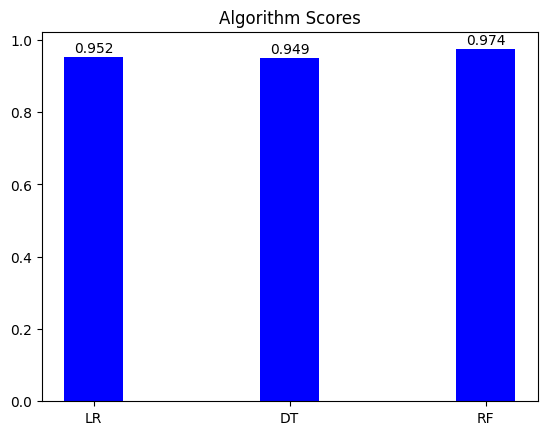

In [43]:
import matplotlib.pyplot as plt

algorithms=["LR","DT","RF"]
scores=[lr_mean,dt_mean,rf_mean]
plt.bar(algorithms,scores,width=0.3,color="blue")

for i, value in enumerate(scores):
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.title("Algorithm Scores")
plt.show()